In [189]:
import sys
sys.path.append('../../alg')
import distance_buffer as db
import math

from shapely.geometry import Polygon
from shapely.geometry import LinearRing
from shapely.geometry import LineString
from shapely.geometry import Point

import numpy as np

from scipy.spatial.distance import euclidean

from math import sqrt
from math import floor
from matplotlib import pyplot
from matplotlib.patches import Circle
from descartes.patch import PolygonPatch

In [648]:
from shapely.geometry import MultiPolygon

In [676]:
reload(db)

<module 'distance_buffer' from '../../alg/distance_buffer.py'>

In [454]:
def poly_loop(poly, r):
    candpts = []
    candpts.append(db.find_cand_points_list_ref(list(poly.exterior.coords),10.0))
    for i in range(0, len(poly.interiors)):
        candpts.append(db.find_cand_points_list_ref(list(poly.interiors[i].coords),10.0))
    
    return candpts
        
    # and process exterior

In [455]:
def buffer_loop(buffers, r):
    candpts = []
    for i in range(0, len(buffers)):
        if isinstance(buffers[i], Polygon):
            print "poly"
            candpts.append(poly_loop(buffers[i], r))
        elif isinstance(buffers[i], MultiPolygon):
            print "multi"
            for j in range(0, len(buffers[i])):
                candpts.append(poly_loop(buffers[i].geoms[j], r))
    return candpts
        

In [504]:
def plot_fig():
    fig = pyplot.figure(1, figsize=(20,20), dpi=90)
    ax = fig.add_subplot(222)
    ax.axis('equal')
    db.plot_coords(ax, targetArea.interiors[0])
    db.plot_coords(ax, targetArea.exterior)
    patch = PolygonPatch(targetArea, facecolor='yellow', edgecolor='#6699cc', alpha=0.1, zorder=2)
    ax.add_patch(patch)
    return ax, fig


In [677]:

## distance fig



#targetArea = Polygon([(0,0),(0,400),(400,400),(400,0)],[[(101,74),(87,93),(99,119),(119,95)],[(200,70),(200,50),(300,20),(330,45),(370,45)]])
targetArea = Polygon([(0,150),(250,200),(150,250),(300,350),(400,375),(400,50),(350,0),(100,10),(25,25)],[[(101,74),(87,93),(99,119),(119,95)],[(200,70),(200,50),(300,20),(330,45),(370,45)]])
#targetArea = Polygon([(0,150),(50,300),(30,400),(250,250),(350,100),(385,400),(200,10),(50,50)],[[(101,74),(87,93),(99,119),(119,95)],[(200,70),(200,50),(300,20),(330,45),(370,45)]])

print targetArea.area



## buffer fig
buffers = db.gen_dist_buffers(10.0, targetArea, 0)



#db.plot_coords_list(ax, pts_buffer1, color="#000000", zorder=3)

92278.0
62893.0105452
38667.0599049
20795.5845307
9194.03941509
1865.8816287
0.0


In [651]:
ipts = []
ipts.append(db.gen_initial_candpt(10.0, (0,150), 60.0))
for i in range(0, len(buffers)*2):
    if i%2 == 0:
        pt = db.gen_initial_candpt(10.0, ipts[i],60.0)
    else:
        pt = db.gen_initial_candpt(10.0, ipts[i],120.0)

    ipts.append(pt)
    print pt

[15.000000000000004, 175.98076211353316]
[7.500000000000007, 188.97114317029974]
[15.000000000000009, 201.96152422706632]
[7.500000000000012, 214.9519052838329]
[15.000000000000014, 227.94228634059948]
[7.500000000000018, 240.93266739736606]
[15.00000000000002, 253.92304845413264]
[7.500000000000023, 266.9134295108992]
[15.000000000000025, 279.9038105676658]
[7.500000000000028, 292.8941916244324]
[15.00000000000003, 305.88457268119896]
[7.500000000000034, 318.87495373796554]


In [681]:
candpts = buffer_loop(buffers, 10.0)

poly
LINE EQ: 
y = 0.2*x + 150.0
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0679366220487 -0.0679366220487
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0728884147321 -0.0728884147321
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0786188155668 -0.0786188155668
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0853271337587 -0.0853271337587
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0932870503848 -0.0932870503848
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.102884877099 -0.102884877099
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.114684140833 -0.114684140833
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRC

0.300345371216 -0.300345371216
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.429276615718 -0.429276615718
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.752162304087 -0.752162304087
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
3.0348987119 -3.0348987119
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
vertical line x = 385.0
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0594038126227 -0.0501628721023
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0614683601513 -0.0614683601513
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.065494179995 -0.065494179995
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0700842933163 -0.0700842933163
ENTE

y = 7.467251417*x + -1885.9122566
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.131986738463 -1.96461281546
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.35455945798 -1.35455945798
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -2.63287240184*x + 940.123478249
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.337419429485 -1.8641522125
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.77453976979 -1.77453976979
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.862493395764*x + 454.027727849
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.5499844018 -1.7153853504
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
2.61274404214 -2.61274404214
no intercept (ther

0.256083829612 -0.256083829612
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.344237482402 -0.344237482402
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.524942297195 -0.524942297195
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.10500744245 -1.10500744245
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 0.2*x + 88.8117658369
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
4.60074462967 -4.60074462967
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 0.863696486908*x + -26.6815789651
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
5.46168954704 -3.71563699141
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -2.0140961931*x + 465.924804241
ENTERING PT SEG CIRCLE ENTERING PT SEG CIR

num of buffers 1


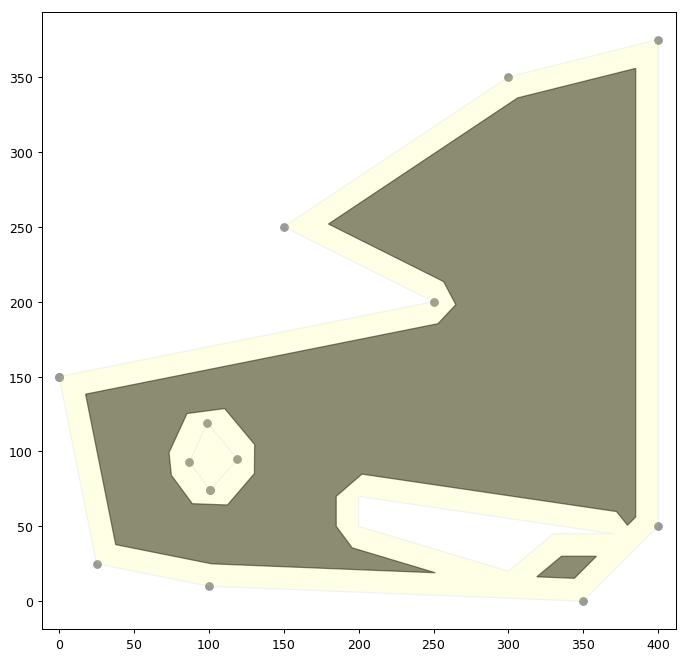

In [668]:
tt=[]
tt.append(targetArea)
tt.append( targetArea.buffer(-1.5*10, 1))
ax, fig = plot_fig()
db.plot_dist_buffers(ax, tt)
pyplot.show()

In [684]:
ax, fig = plot_fig()
for b in buffers:
    print type(b)
db.plot_dist_buffers(ax, buffers)
#pyplot.show()

<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.polygon.Polygon'>
num of buffers 5


In [622]:
db.plot_coords_list(ax, ipts, color="#000000", zorder="3" )

In [685]:
for i in range(0,len(candpts)):
    #print list(candpts[i])
    for j in range(0, len(candpts[i])):
        db.plot_coords_list(ax, candpts[i][j], color="#000000", zorder="3" )
        db.plot_radii(ax, candpts[i][j], 10.0, color="#999999", zorder=4, alpha=0.3)
        #print "\t"+str(len(candpts[i][j]))
        #for k in range(0, len(candpts[i][j])):
            
            
            #print "\t\t"+str(len(candpts[i][j][k]))
            #print list(candpts[i][j][k])


IndexError: list index out of range

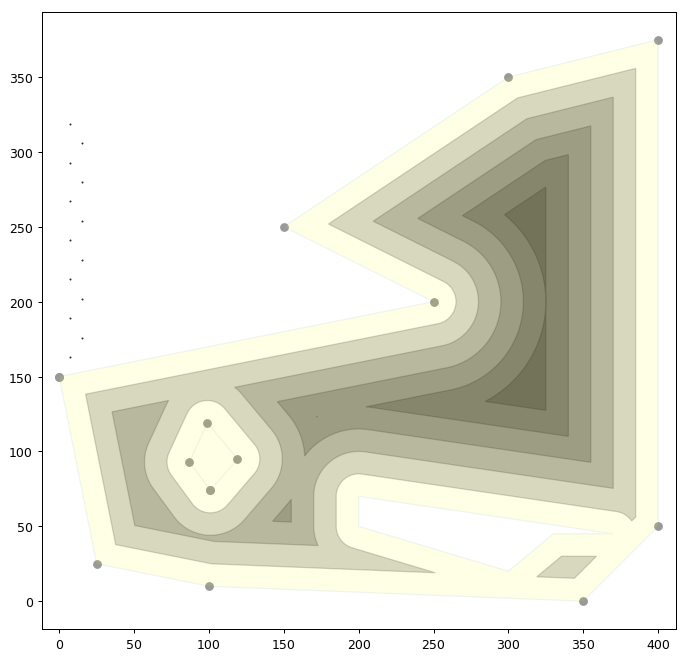

In [623]:
pyplot.show()


13.6602540378 -10.0
11.1871000912 -8.26827896338


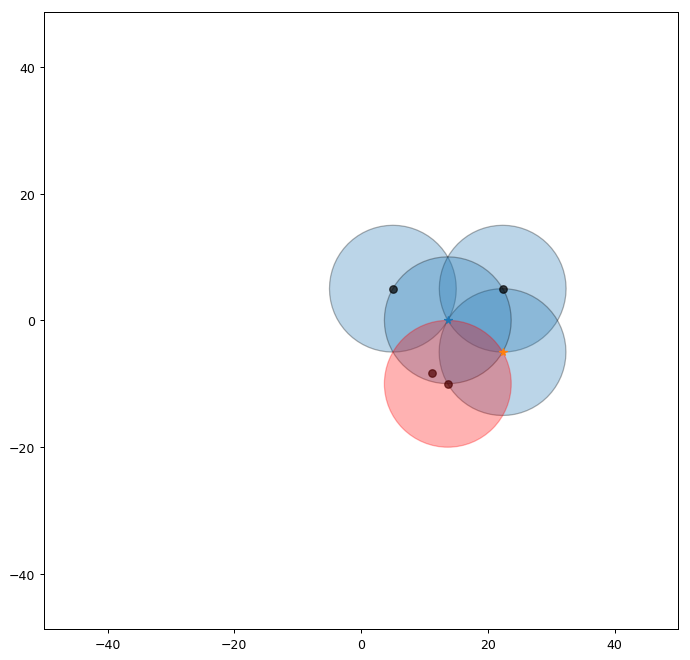

In [766]:
fig2 = pyplot.figure(1, figsize=(20,20), dpi=90)
ax2 = fig2.add_subplot(222)
ax2.axis('equal')
pt1 = (5.0,5.0)
t = (5.0+sqrt(3)*10)
pt2 = (t,5.0)

a1 = 60
a2 = 50

endx = pt2[0]-sqrt(3)*10.0*math.cos(math.radians(a1))
endy = pt2[1]-sqrt(3)*10.0*math.sin(math.radians(a1))
endx1 = pt2[0]-sqrt(3)*10.0*math.cos(math.radians(a2)) #+pt1[0]
endy1 = pt2[1]-sqrt(3)*10.0*math.sin(math.radians(a2)) #+pt1[1]
print endx, endy
print endx1, endy1


c1 = Circle(pt1, 10.0, color="#000000", zorder=2, alpha=0.3)
c2 = Circle(pt2, 10.0, color="#000000", zorder=2, alpha=0.3)
c3 = Circle([endx,endy], 10.0, color="#ff0000", zorder=2, alpha=0.3)
c4 = Circle([endx1,endy1], 10.0, color="#00ff00", zorder=2, alpha=0.3)


ax2.add_patch(PolygonPatch(Point(pt1).buffer(10.0),  alpha=0.3))
ax2.add_patch(PolygonPatch(Point(pt2).buffer(10.0),  alpha=0.3))

#ax2.add_patch(c1)
#ax2.add_patch(c2)
ax2.add_patch(c3)
#ax2.add_patch(c4)
ax2.plot(pt1[0],pt1[1], 'o', color="#000000", zorder=1, alpha=.7)
ax2.plot(pt2[0],pt2[1], 'o', color="#000000", zorder=1, alpha=.7)
ax2.plot(endx, endy, 'o', color="#000000", zorder=1, alpha=.7)
ax2.plot(endx1, endy1, 'o', color="#000000", zorder=1, alpha=.7)
pt3 = (13.660254037844386, 0.02082622037097895)
anotherpt = (22.296256658592572, -4.9988086042756175)

ax2.plot(pt3[0],pt3[1], '*')
ax2.plot(anotherpt[0],anotherpt[1],'*')
p = Point(pt3).buffer(10.0)
p1 = Point(anotherpt).buffer(10.0)
ax2.add_patch(PolygonPatch(p1, alpha=0.3))
ax2.add_patch(PolygonPatch(p, alpha=0.3))

ax2.set_xlim([-50,50])
ax2.set_ylim([-50,50])

pyplot.show()

In [738]:
#this is the bottom intersection point of the two circles
list(((Point(pt1).buffer(10.0)).exterior).intersection((Point(pt2).buffer(10.0)).exterior)[0].coords)

[(13.660254037844386, 0.02082622037097895)]

In [762]:
list((p.exterior).intersection((Point(pt2).buffer(10.0)).exterior)[1].coords)

[(22.296256658592572, -4.9988086042756175)]

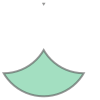

In [724]:
(list((Point(pt1).buffer(10.0)).intersection(Point(pt2).buffer(10.0)).exterior.coords))

[(15.0, 5.0),
 (14.95184726672197, 4.019828596704395),
 (14.807852804032304, 3.0490967798387194),
 (14.56940335732209, 2.097153227455379),
 (14.23879532511287, 1.173165676349106),
 (13.819212643483553, 0.2860326317400279),
 (13.660254037844386, 0.02082622037097895),
 (13.501295432205229, 0.28603263174001015),
 (13.081712750575909, 1.1731656763490887),
 (12.751104718366687, 2.097153227455364),
 (12.512655271656469, 3.049096779838705),
 (12.368660808966803, 4.019828596704383),
 (12.320508075688771, 4.99999999999999),
 (12.368660808966801, 5.980171403295597),
 (12.512655271656465, 6.950903220161275),
 (12.75110471836668, 7.902846772544617),
 (13.081712750575901, 8.826834323650893),
 (13.501295432205218, 9.713967368259972),
 (13.660254037844386, 9.979173779629022),
 (13.81921264348352, 9.713967368260034),
 (14.238795325112841, 8.82683432365096),
 (14.569403357322068, 7.9028467725446925),
 (14.80785280403229, 6.950903220161357),
 (14.95184726672196, 5.980171403295685),
 (15.0, 5.00000000000

In [704]:
print type(Circle)

<type 'type'>
